#  Potential of Tennis Players: A Predictive Model for Player's Best Rank.
### Group 10: Alan Wu, Emily Berard, Mike Nguyen, Andy Xin

### Introduction
#### Background information:
Every year since 1990, the ATP (Association of Tennis Professionals), holds the ATP Tour, a worldwide tennis tour for mens’ professional tennis. The tour is divided into multiple tiers and uses a point system, with higher tiers offering more ranking points. The PIF ATP Rankings, a merit-based method used by the ATP, is used to rank players, determine entry qualifications, and organize the tournament seeding. The points– and prize money– awarded to each player in the ATP Tour is based on the stage of the tournament reached and the tier. These rankings are updated weekly and most rewarded points are dropped 52 weeks after being awarded, with some exceptions. Aside from the official rankings, there are also the ELO rankings, which rank the players based on past performances and update with the results of each match. 

#### Our research question:
Using a data set containing ATP player stats from 2017-2019, we wish to predict the best rank of players based on other variables. What will a player’s best rank be, according to other rankings and characteristics
?

#### The datase
The data set, player_stats.csv, contains information on the top 500 players in the ATP between 2017-2019. It contains 37 variables, both qualitative and quantitative values, though many contain incomplete information and do not report on all 500 players. t


## Methods

### 1. Outline:
For this project, we decided to use linear regression for the data analysis part in order to solve our predictive question: “Predicting the best ranks Best ELO Rank, Current Rank, Peak ELO Rank”. The Data Analysis Process of this project follows the following steps:

1. **Loading Packages**: Initially, loaded R packages `tidyverse`, `dplyr` and `tidymodels` for data manipulation and visualization.

2. **Data Import**: Using `read_csv()` to load the dataset for our analysis.

3. **Data Exploration**: Using `head()` to take a preview and understand the dataset's structure and contents.

4. **Data Cleaning**: The data is cleaned by handling missing values, converting data types, and addressing outliers if present.

5. **Data Splitting**: The dataset is divided into training and testing sets, and working with only the training dataset.

6. **Data Summary**: Summarized the training set to figure out if any variables are not strong enough (have too many NAs) for us to use as predictors.
   
7. **Data Visualization**: Visualized the relationship between different variables and best rank variables to get a deeper understanding of how well each variable predicts a player's best rank.
   
9. **Model Building**: Specifying the dependent and independent variables. Then, start working on the linear regression model by creating the model specification and recipe, and fit our simple linear regression model using workflow.

10. **Model Evaluation**: The model's performance is evaluated using metrics using R-squared, RMSE (Root Mean Squared Error), and by plotting residuals to assess the model's fit.

11. **Interpreting Results**: The coefficients of the model are interpreted to understand the relationships between variables and their impact on the dependent variable. 

12. **Making Predictions**: We will use the test data that we splitted in step 5, using the `predict()` function, to assess how well our model does.


### 2. Relevant variables:
Predicted Variable: Best Rank
  
Potential Predictors:
- Age: age of player
- Height (cm): Height of the players
- Weight (kg): Weight of the players
- Turned Pro: The year the player become professional
- Titles: The number of titles won
- Current Rank: current rank of player
- Current ELO Rank: player's current ELO rank
- Best ELO Rank: player's best ELO rank
- Peak ELO Rating: player's peak ELO rating
- Seasons: Number of seasons participated

### 3. Visualization:
There are two main visualizations we performed in the report: A Pairs Plot (ggpairs) and a scatter plot.

- Pairs Plot (ggpairs): The Pairs Plot was created to visualize the correlation between various predictors given in the dataset such as Age, Height, Current Rank, Best Rank, etc. After that, we finalized the plot by excluding a few uncorrelated predictors such: Height, Weight, and Title. From this plot, we decide whether or not a variable should be used as a predictor for our project.

- Scatterplot (with a line of best fit): 
We graphed a scatter plot with a line of best fit to visualize our regression model. It shows how our regression model fares with the data. 


# Preliminary Exploratory Data Analysis
### Reading and Cleaning Data

In [11]:
# Retrieving nessesary packages
library(dplyr)
library(tidyverse)
library(tidymodels)
library(GGally)

In [12]:
# Reading the data file
url = "https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS"
player_data = read_csv(url)

# Cleaning the data and getting what we need: Best Rank, 
processed_player_data = player_data |>
                        # Cleaning Age column
                        separate(Age, c("Age", "Birth date"), sep = " ") |>
                        mutate(Age = as.numeric(Age)) |>
                        # Cleaning Current Rank column
                        separate(`Current Rank`, c("CurrentRank", "Current Rank (Other)"), sep = " ") |>
                        mutate(`CurrentRank` = as.numeric(`CurrentRank`)) |>
                        # Cleaning Best Rank column
                        separate(`Best Rank`, c("BestRank", "Best Rank (Date)"), sep = " ") |>
                        mutate(`BestRank` = as.numeric(`BestRank`)) |>
                        # Cleaning Height column
                        separate(`Height`, c("Height(cm)", "cm REMOVE"), sep = " ") |>
                        mutate(`Height(cm)` = as.numeric(`Height(cm)`)) |>
                        # Cleaning Weight column
                        separate(`Weight`, c("Weight(kg)", "kg REMOVE"), sep = " ") |>
                        mutate(`Weight(kg)` = as.numeric(`Weight(kg)`)) |>
                        # Cleaning Current ELO Rank column
                        separate(`Current Elo Rank`, c("CurrentEloRank", "eloRank REMOVE"), sep = " ") |>
                        mutate(`CurrentEloRank` = as.numeric(`CurrentEloRank`)) |>
                        # Cleaning Best ELO Rank column
                        separate(`Best Elo Rank`, c("BestEloRank", "eloBest REMOVE"), sep = " ") |>
                        mutate(`BestEloRank` = as.numeric(`BestEloRank`)) |>
                        # Cleaning Peak ELO Rank column
                        separate(`Peak Elo Rating`, c("PeakEloRating", "eloPeak REMOVE"), sep = " ") |>
                        mutate(`PeakEloRating` = as.numeric(`PeakEloRating`)) |>
                        # Cleaning Turned Pro
                        mutate(`TurnedPro` = `Turned Pro`) |>

                        # Selecting all relevant variables 
                        select(Age, `CurrentRank`, `BestRank`, `Height(cm)`, `TurnedPro`, Seasons, Titles, `Weight(kg)`,`CurrentEloRank`,`BestEloRank`,`PeakEloRating`)

head(processed_player_data)
# Splitting the data
set.seed(1000)

player_split = initial_split(processed_player_data, prop = 3/4, strata = `BestRank`)
player_training = training(player_split) 
player_testing = testing(player_split)

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,CurrentRank,BestRank,Height(cm),TurnedPro,Seasons,Titles,Weight(kg),CurrentEloRank,BestEloRank,PeakEloRating
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
26,378,363,NA,NA,NA,NA,NA,NA,NA,NA
18,326,316,NA,NA,NA,NA,NA,NA,NA,NA
32,178,44,185,2005,14,NA,NA,144,60,1886
21,236,130,NA,NA,2,NA,NA,NA,NA,NA
27,183,17,193,2008,11,4,NA,100,21,2037
22,31,31,NA,2015,5,1,NA,33,33,1983


# Initial Analysis:
## Data Summary

In [13]:
# Summary for data
# Our group is planning to predict the best rank varible. Therefore, we want to find out if there are a lot of missing
# data include in the variables that we are trying to analyze.

age_missing_data <- player_training |> count(is.na(`Age`))
#country_missing_data <- player_training |> count(is.na(`Country`))
#plays_missing_data <- player_training |> count(is.na(`Plays`))
current_rank_missing_data <- player_training |> count(is.na(`CurrentRank`))
best_rank_without_missing_data <- player_training |> count(is.na(`BestRank`))
#backhand_rank_missing_data <- player_training |> count(is.na(`Backhand`))
height_rank_missing_data <- player_training |> count(is.na(`Height(cm)`))
turned_pro_missing_data <- player_training |> count(is.na(`TurnedPro`))
seasons_missing_data <- player_training |> count(is.na(`Seasons`))
titles_missing_data <- player_training |> count(is.na(`Titles`))
weight_missing_data <- player_training |> count(is.na(`Weight(kg)`))
current_elo_rank <- player_training |> count(is.na(`CurrentEloRank`))
best_elo_rank <- player_training |> count(is.na(`BestEloRank`))
peak_elo_rating <- player_training |> count(is.na(`PeakEloRating`))


#na_table1 <- bind_cols(age_missing_data, country_missing_data, plays_missing_data, current_rank_missing_data, 
#                    best_rank_without_missing_data, backhand_rank_missing_data)
#na_table2 <- bind_cols(height_rank_missing_data, turned_pro_missing_data, seasons_missing_data,
#                    titles_missing_data, weight_missing_data)

na_table1 <- bind_cols(age_missing_data, current_rank_missing_data, 
                    best_rank_without_missing_data, height_rank_missing_data)
na_table2 <- bind_cols(turned_pro_missing_data, seasons_missing_data,
                    titles_missing_data, weight_missing_data)
na_table3 <- bind_cols(current_elo_rank, best_elo_rank, peak_elo_rating)

na_table1
na_table2
na_table3

New names:
• `n` -> `n...2`
• `n` -> `n...4`
• `n` -> `n...6`
• `n` -> `n...8`
New names:
• `n` -> `n...2`
• `n` -> `n...4`
• `n` -> `n...6`
• `n` -> `n...8`
New names:
• `n` -> `n...2`
• `n` -> `n...4`
• `n` -> `n...6`


is.na(Age),n...2,is.na(CurrentRank),n...4,is.na(BestRank),n...6,is.na(`Height(cm)`),n...8
<lgl>,<int>,<lgl>,<int>,<lgl>,<int>,<lgl>,<int>
FALSE,372,FALSE,368,FALSE,372,FALSE,90
TRUE,1,TRUE,5,TRUE,1,TRUE,283


is.na(TurnedPro),n...2,is.na(Seasons),n...4,is.na(Titles),n...6,is.na(`Weight(kg)`),n...8
<lgl>,<int>,<lgl>,<int>,<lgl>,<int>,<lgl>,<int>
FALSE,187,FALSE,277,FALSE,74,FALSE,15
TRUE,186,TRUE,96,TRUE,299,TRUE,358


is.na(CurrentEloRank),n...2,is.na(BestEloRank),n...4,is.na(PeakEloRating),n...6
<lgl>,<int>,<lgl>,<int>,<lgl>,<int>
FALSE,133,FALSE,174,FALSE,174
TRUE,240,TRUE,199,TRUE,199


### Summary Conclusion
After comparing the data in the table, we find out the `Height (cm)`, `Titles`, and the `Weight (kg)` variables have too many NAs. These three columns are not strong enough to help us making predictions for `BestRank`. Therefore, we decided to remove these three variables for our subsequent analysis.

# Initial Analysis:
### Visualization

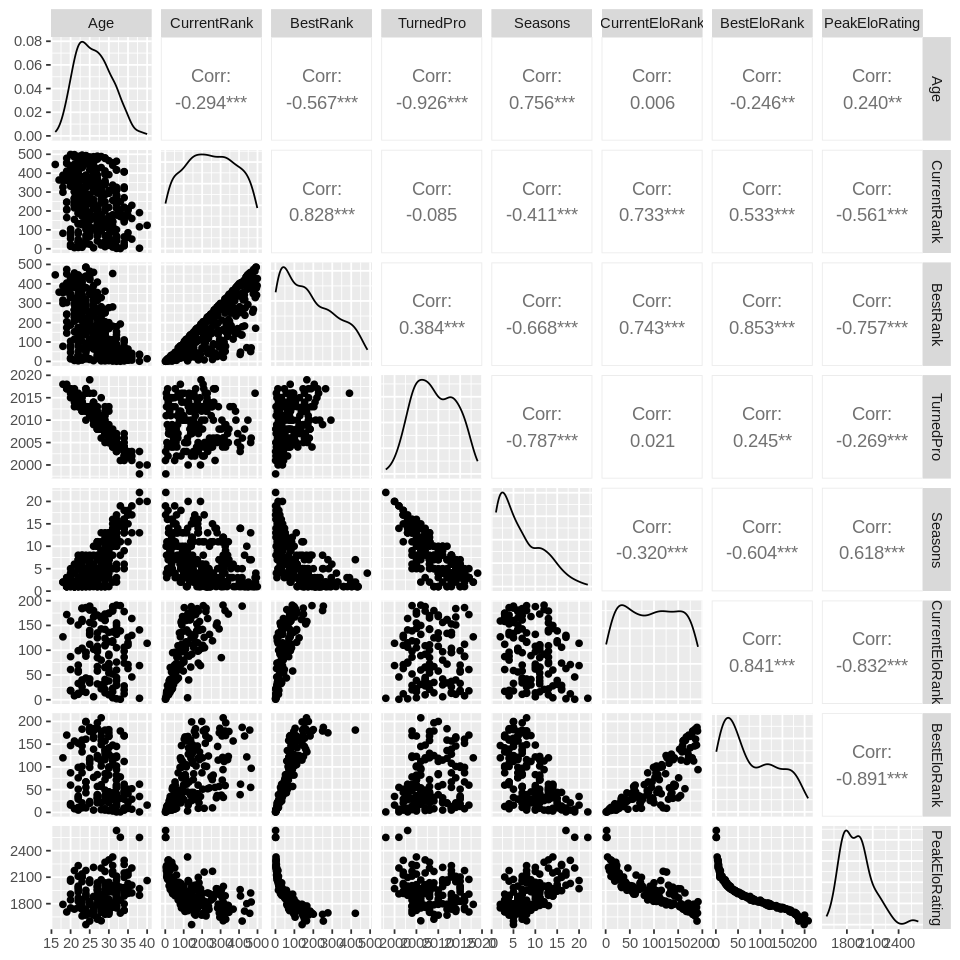

In [14]:
# Visualization for data initial analysis

# By implementing our summary conclusion, we will remove Height, Titles and the Weight variables from the original data frame.

player_training <- player_training |> 
                            select(-`Height(cm)`,-`Titles`,-`Weight(kg)`)

# ggpairs 
player_paired = player_training |>
                ggpairs()
options(repr.plot.width = 8, repr.plot.height = 8)

# Showing the plot will take a little, please be patient
options(warn=-1)
player_paired
options(warn=0)

# From the ggpairs plot, we find the range of correlation to be from 0.082 to 0.853. 
# The highest correlation turns out to be Best Elo Rank, at 0.853. 
# Therefore, we choose to use Best Elo Rank as the predictor for Best Rank.

# Data Analysis:
#### Using Linear Regression for Prediction

Linear regression is chosen over k-NN regression in our report as it provides **interpretable coefficients** that showcase the impact of Age, Best Elo Rank and Seasons on the Best Rank. This interpretability is particularly valuable for understanding how changes in variables affect outcomes. Moreover, linear regression is **computationally efficient**, making it suitable for large datasets, and it can handle extrapolation, which is crucial when making predictions beyond the observed data range. Linear regression's **robustness to noise** and its **ability to highlight feature importance** further enhance its utility.

Conversely, K-NN regression lacks the linearity assumption, making it suitable for non-linear relationships but sacrificing interpretability. It can be computationally intensive, especially with large datasets, and is sensitive to noise and outliers, potentially affecting prediction accuracy. K-NN's limitations in handling noise and extrapolation make linear regression a preferred choice in many analytical contexts.

Warning message:
“Removed 199 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 199 rows containing missing values or values outside the scale range
(`geom_line()`).”


[1] 31.90887

[1] 30.54646

[1] 30.43747

[1] 17.27761

[1] 24.14198

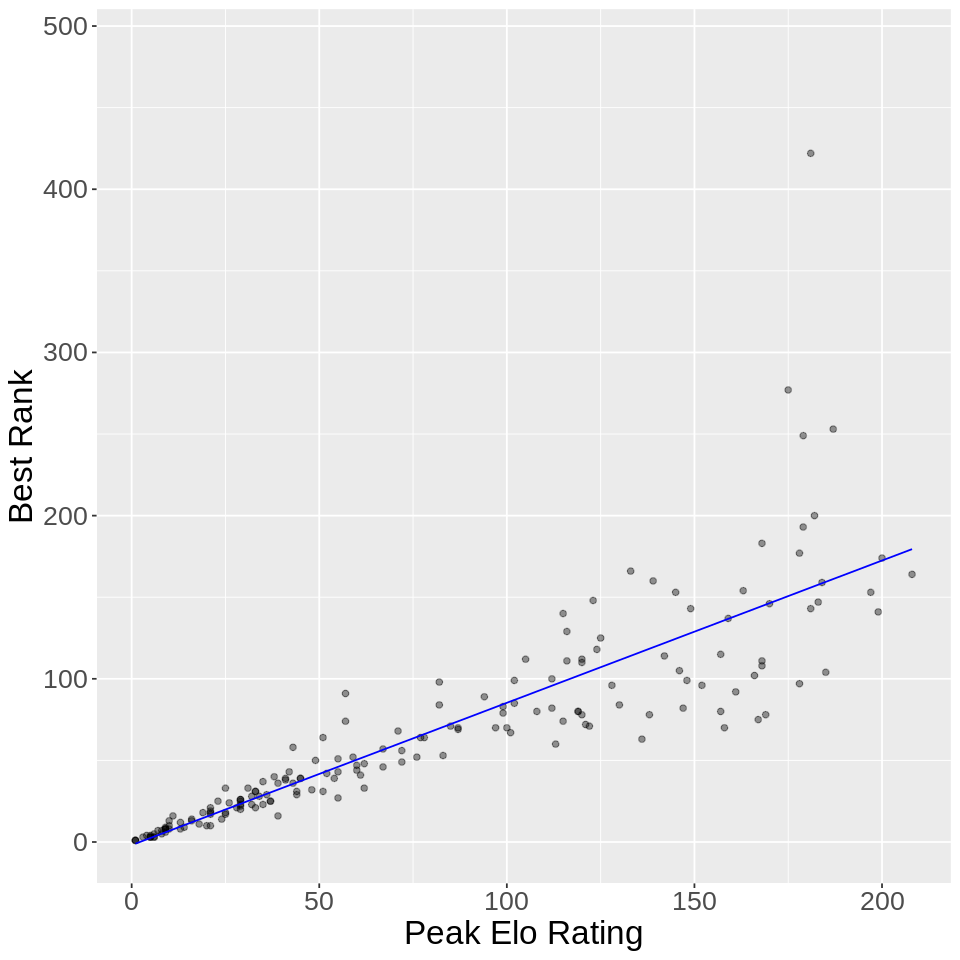

In [16]:
# Data Analysis For Linear Regression Predicting Best Rank with a combination of mentioned predictors
set.seed(1000)
options(repr.plot.width=8, repr.plot.height=8)

# Best Rank predicted with Best Elo Rank
lm_spec = linear_reg(mode = "regression", engine = "lm")
player_recipe = recipe(`BestRank` ~ `BestEloRank`, data=player_training)

lm_fit = workflow() |>
         add_recipe(player_recipe) |>
         add_model(lm_spec) |>
         fit(data=player_training)

rating_predictions = lm_fit |>
                     predict(player_training) |>
                     bind_cols(player_training)

lm_predictions = rating_predictions |>
                 ggplot(aes(x = `BestEloRank`, y = `BestRank`)) +
                 geom_point(alpha = 0.4) +
                 geom_line( mapping = aes(x = `BestEloRank`, y = .pred), color = "blue") +
                 xlab("Peak Elo Rating") +
                 ylab("Best Rank") +
                 theme(text = element_text(size=20))

lm_predictions

lm_rmse = lm_fit |>
           predict(player_training) |>
           bind_cols(player_training) |>
           metrics(truth = `BestRank`, estimate = .pred) |>
           filter(.metric == "rmse") |>
           select(.estimate) |>
           pull()

lm_rmse

# Best Rank predicted with Best Elo Rank + Current Rank
lm_spec = linear_reg(mode = "regression", engine = "lm")
player_recipe = recipe(`BestRank` ~ `BestEloRank` + `CurrentRank`, data=player_training)

lm_fit = workflow() |>
         add_recipe(player_recipe) |>
         add_model(lm_spec) |>
         fit(data=player_training)

lm_rmse = lm_fit |>
           predict(player_training) |>
           bind_cols(player_training) |>
           metrics(truth = `BestRank`, estimate = .pred) |>
           filter(.metric == "rmse") |>
           select(.estimate) |>
           pull()

lm_rmse

# Best Rank predicted with Best Elo Rank + Current Rank + Peak Elo Rating
lm_spec = linear_reg(mode = "regression", engine = "lm")
player_recipe = recipe(`BestRank` ~ `BestEloRank` + `CurrentRank` + `PeakEloRating`, data=player_training)

lm_fit = workflow() |>
         add_recipe(player_recipe) |>
         add_model(lm_spec) |>
         fit(data=player_training)

lm_rmse = lm_fit |>
           predict(player_training) |>
           bind_cols(player_training) |>
           metrics(truth = `BestRank`, estimate = .pred) |>
           filter(.metric == "rmse") |>
           select(.estimate) |>
           pull()

lm_rmse

# From the correlation data we generated from the visualization part above, we can easily see the correlation between 
# the variables. From the ggpair plot we found out that Best Elo Rank has the highest correlation of 0.853. Therefore, 
# we started by predicting Best Rank with Best Elo Rank. Then, we continue with the second highest correlation which is 
# Current Rank with a correlation of 0.828. After that, we continue with Peak Elo Rating that has a correlation of -0.757
# with Best Rank. Then we stop adding more variables in.

# We decided to stop after adding the top 3. Firstly, the fourth highest correlation Current Elo Rank has too many NAs, which
# is bad for our prediction. Secondly, even though adding more variables in can improve our predictions but it might 
# increase computational cost and overfitting risks. We decide to balance model performance with keeping low cost and 
# make the model more useful.

lm_spec = linear_reg(mode = "regression", engine = "lm")
player_recipe = recipe(`BestRank` ~ `BestEloRank` + `CurrentRank` + `PeakEloRating` + `CurrentEloRank`, data=player_training)

lm_fit_discussion = workflow() |>
         add_recipe(player_recipe) |>
         add_model(lm_spec) |>
         fit(data=player_training)

lm_rmse = lm_fit_discussion |>
           predict(player_training) |>
           bind_cols(player_training) |>
           metrics(truth = `BestRank`, estimate = .pred) |>
           filter(.metric == "rmse") |>
           select(.estimate) |>
           pull()

lm_rmse

# Finally, we evaluate our model with the 3 predictors, with testing data:
lm_rmspe = lm_fit |>
           predict(player_testing) |>
           bind_cols(player_testing) |>
           metrics(truth = `BestRank`, estimate = .pred) |>
           filter(.metric == "rmse") |>
           select(.estimate) |>
           pull()

lm_rmspe

# Discussion

### Why Linear Regression instead of KNN-Regression?

Linear regression was chosen over k-NN regression in our report as it provides **interpretable coefficients** that showcase the impact of Age, Best Elo Rank and Seasons on the Best Rank. This interpretability is particularly valuable for understanding how changes in variables affect outcomes. Moreover, linear regression is **computationally efficient**, making it suitable for large datasets, and it can handle extrapolation, which is crucial when making predictions beyond the observed data range. Other than that, Linear regression **robustness to noise** and its **ability to highlight feature importance** further enhance its utility. Linear regression is also able to predict beyond the range of the training data, allowing us to make reasonable predictions for observations with greater values.

Conversely, K-NN regression lacks the linearity assumption, making it suitable for non-linear relationships but sacrificing interpretability. It can be computationally intensive, especially with large datasets, and is sensitive to noise and outliers, potentially affecting prediction accuracy. K-NN's limitations in handling noise and extrapolation make linear regression a preferred choice for Best Rank analysis.

#################
Linear regression is chosen over k-NN regression in our report as it provides **interpretable coefficients** that showcase the impact of Age, Best Elo Rank and Seasons on the Best Rank. This interpretability is particularly valuable for understanding how changes in variables affect outcomes. Moreover, linear regression is **computationally efficient**, making it suitable for large datasets, and it can handle extrapolation, which is crucial when making predictions beyond the observed data range. Linear regression's **robustness to noise** and its **ability to highlight feature importance** further enhance its utility.

Conversely, K-NN regression lacks the linearity assumption, making it suitable for non-linear relationships but sacrificing interpretability. It can be computationally intensive, especially with large datasets, and is sensitive to noise and outliers, potentially affecting prediction accuracy. K-NN's limitations in handling noise and extrapolation make linear regression a preferred choice in many analytical contexts.


### Summary:

To summarize what we did, we read and cleaned the player_stats.csv, removing categorical variables. Then we summarized the data by checking which variables to omit based on the number of NA values. Then we visualized the data with ggpairs to determine which variables have the most correlation with Best Rank. Then, we chose the highest correlating variable and used it as the predictor, and visualized the linear regression model. Then, we added 2 more predictors (based on the ggpairs grid) for a total of 3 predictors, while making sure the RMSE does not increase with the training set. Finally, we tested the linear regression model with the testing set to find the RMSPE to be 24.


### Expected findings:
We expect that a higher current rank, ELO ranks, and number of seasons will generally correlate with a higher best rank for that player.

### Relevancy of findings:
Our classification model could be used to predict how future ATP tennis players will rank. These findings could also reveal correlations between the predictor variables and the predicted variable, allowing tennis players to consider how these variables may have an influence on their performance. 

### Future studies:
More specific studies, that compare predictor variables and player rank in more depth, could provide more insight into possible correlations between the variables and player performance. Additionally, we focused on top players in the ATP, but future studies could be done on a wider population of tennis players, or on more casual players.

# References:

#### Data from:
- Ultimate tennis statistics. (n.d.). Ultimate Tennis Statistics.  
https://www.ultimatetennisstatistics.com/  


#### ATP information from:
- Wikipedia contributors. (2024, March 1). Association of Tennis Professionals - Wikipedia.     https://en.wikipedia.org/wiki/Association_of_Tennis_Professionals 

- Wikipedia contributors. (2024, March 6). ATP rankings. Wikipedia.  
https://en.wikipedia.org/wiki/ATP_rankings 

